### **1.0 Fashion Images** 
**Training the neural network to recogonize fashion images**. 
How to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer

Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing **10 different types**. We use the **fashion_MNIST** dataset from keras. **[0]** is a boot, and **[1]** is a t-shirt

### **Import and load data**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

#import fashion mnist train and test images and load data
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a **train_images**, and a **train_labels** to see...Experiment with different indices in the array. For example, also take a look at index 1...which is a t-shirt 

0
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16 

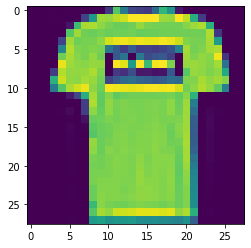

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])
print(train_labels[1])
print(train_images[1])

### **Prepare data (normalize data)**

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between **0 and 1**, a process called **'normalizing'**...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this: **/255**

In [ ]:
# normalize train_images and train_labels
train_images = train_images / 255
train_labels = train_labels /255

Now you might be wondering why there are 2 sets...training and testing. The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them.

## **Build(layers) & Compile neural network**
- A Flatten layer (define sequence of layers in Neural network)
- A Dense(128) layer with activation relu, 
- A Dense(10) layer with activation softmax

In [ ]:
# build layers
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation = 'relu'),
                                  tf.keras.layers.Dense(10, activation = 'softmax')])

    Sequential: That defines a SEQUENCE of layers in the neural network. 
    Flatten: turns square image into a 1 dimensional set. 
    Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

    Relu: effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values >=0 to the next layer in the network.
    Softmax: takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!
    Sigmoid: network predict values between 0 and 1 probability

In [ ]:
# compile model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

**Loss**, how good the predictions are. **Optimizer**, generates new predictions

**optimizer = **'rmsprop'**, **'adam'** (finding optimal values)

**loss** = **'categorical_crossentropy'** ( ouput probability) targets **one-hot-coded**. = **'sparse_categorical_crossentropy'** targets **integers**

### **Train(fit) model**

In [ ]:
# train model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.8311 - accuracy: 0.6853
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6515 - accuracy: 0.7671
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5712 - accuracy: 0.7961
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5329 - accuracy: 0.8174
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5093 - accuracy: 0.8282


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like **0.8917**. This tells you that your neural network is about **90%** accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked **90% ** of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call **model.evaluate**, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [ ]:
# evaluate model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.8180


[0.6007909178733826, 0.8180000185966492]

For me, that returned a accuracy of about **.8903**, which means it was about **89%** accurate. As expected it probably would not do as well with unseen data as it did with data it was trained on! As you go through this course, you'll look at ways to improve this.

### **Exercise 1:**
Let's now look at the layers in your model. Experiment with different values for the dense layer with **1024 neurons**. What different results do you get for loss, training time etc? Why do you think that's the case?
- import and load data
- prepare(vectorize.reshape)data
- built(layers)and compile neural network
- compile neural network
- train (fit) model, evaluate model, classify(predict) and print model

In [ ]:
# import and load data
import tensorflow as tf
import numpy as np
from tensorflow import keras

# import mnist dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# prepare(vectorize.reshape)data
train_images = train_images / 255
train_labels = train_labels /255

# built(layers)and compile neural network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(1024, activation = 'relu'),
                                   tf.keras.layers.Dense(10, activation = 'softmax')])

# compile model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train(fit) model
model.fit(train_images, train_labels, epochs=5)

# evaluate model
model.evaluate(test_images, test_labels)

# classify(predict) and print model
classify = model.predict(test_images)
print(classify[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0019 - accuracy: 0.0987
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 7.4727e-08 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4400e-08 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 5.0842e-09 - accuracy: 0.0987
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 10043.2031 - accuracy: 0.0980
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7


#### **Question 1. Increase to 1024 Neurons -- What's the impact?**

Training took longer, by adding more neurons, we had to do more calculations, slowing down the process, but obtaining more accurate results

### **Exercise 2:**
What would happen if you remove the Flatten() layer. Why do you think that's the case? **Flatten**: turns square image into a 1 dimensional set

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

### **Exercise 3:**
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- **the number of neurons in the last layer** should match **the number of classes you are classifying for**. In this case it's the digits **0-9, so there are 10** of them, hence you should have **10 neurons in your final layer.**

### **Exercise 4:**

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.
